# Feature Selection

## Importing Feature Created Dataset

In [78]:
import pandas as pd
pd.set_option('display.max_columns', None)

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

import sys
import os
sys.path.append(os.path.abspath('../../..'))
from utils import pandas_column_utils
from utils import array_utils

url = '../../../datasets/preprocessed/ft_created.csv'
feature_created_fifa_df = pd.read_csv(url, low_memory=False)
feature_selected_fifa_df = feature_created_fifa_df

## Selecting Relevant Feature

### Checking Feature

In [79]:
feature_selected_fifa_df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Potential',
       'Club', 'Club Logo', 'Value (€)', 'Wage (€)', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Contract Valid Until', 'Height (m)',
       'Weight (kg)', 'Crossing', 'Finishing', 'Heading Accuracy',
       'Short Passing', 'Volleys', 'Dribbling', 'Curve', 'FK Accuracy',
       'Long Passing', 'Ball Control', 'Acceleration', 'Sprint Speed',
       'Agility', 'Reactions', 'Balance', 'Shot Power', 'Jumping', 'Stamina',
       'Strength', 'Long Shots', 'Aggression', 'Interceptions', 'Positioning',
       'Vision', 'Penalties', 'Composure', 'Standing Tackle', 'Sliding Tackle',
       'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning',
       'GK Reflexes', 'Best Position', 'Best Overall Rating',
       'Release Clause (€)', 'Defensive Awareness', 'Encoded Preferred Foot'

NOTE:
1. Removing Irrelevant Feature

    (ID, Name, Photo, Club Logo, Flag, Real Face, Encoded Real Face)
2. Handling High Cardinality Categorical Feature
3. Removing The Original Feature That Already Encoded

### Removing Irrelevant Feature

In [80]:
# TODO: Remove potential leakage (Best Overall Rating, Best Position)

In [81]:
feature_selected_fifa_df = feature_selected_fifa_df.drop(
    columns=[
        'ID',
        'Name',
        'Photo',
        'Club Logo',
        'Flag',
        'Real Face',
        'Encoded Real Face',
    ]
)

feature_selected_fifa_df.head(2)

,Age,Nationality,Potential,Club,Value (€),Wage (€),Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height (m),Weight (kg),Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Best Position,Best Overall Rating,Release Clause (€),Defensive Awareness,Encoded Preferred Foot,Offensive Work Rate,Encoded Offensive Work Rate,Defensive Work Rate,Encoded Defensive Work Rate,Encoded Position,Encoded Best Position,Good Player,Potential Normalized,Potential Value,Skill Score Total,Physical Score Total,Defensive Score Total,Attacking Score Total,Goalkeeper Score Total,Skill to Experience Ratio,Body Mass Index
0,33.0,Uruguay,87.000000,Atlético Madrid,1.869589e+07,73807.945008,2316.0,Right,2.514853,4.0,3.0,High/ Medium,PLAYER_BODY_TYPE_374,RS,9.0,2020,2022,1.8288,86.182480,80.0,92.0,84.0,83.0,90.0,84.0,86.0,82.0,77.0,84.0,72.0,68.0,76.0,90.321591,78.0,89.0,69.0,78.0,85.0,88.0,87.0,41.0,91.0,84.0,83.0,85.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,87.000000,64599999.0,57.0,1,High,3.0,Medium,2.0,3.0,3,1,0.969159,1.811928e+07,842.0,526.0,353.0,866.0,153.0,25.515144,25.768347
1,29.0,Belgium,89.768582,Manchester City,1.869589e+07,73807.945008,2304.0,Right,2.514853,5.0,4.0,High/ High,PLAYER_BODY_TYPE_321,RCM,17.0,2015,2023,1.8034,69.853168,94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,92.0,77.0,76.0,78.0,90.321591,76.0,91.0,63.0,89.0,74.0,91.0,76.0,66.0,88.0,94.0,84.0,91.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0,CAM,88.073376,161000000.0,68.0,1,High,3.0,High,3.0,2.0,2,1,1.000000,1.869589e+07,848.0,533.0,402.0,878.0,56.0,29.241369,21.478402


### Handling High Cardinality Categorical Feature

In [82]:
# TODO: Handling high cardinality feature (Club, Nationality)
# We can use some method to minimize the cardinality size
# Available method:
# 1. Target encoding,
# 2. Frequency or count encoding,
# 3. Label encoding,
# 4. one-hot encoding,
# 5. grouping encoding, etc.

In [83]:
le = LabelEncoder()
feature_selected_fifa_df['Encoded Body Type'] = le.fit_transform(feature_selected_fifa_df['Body Type'])

feature_selected_fifa_df.head(2)

,Age,Nationality,Potential,Club,Value (€),Wage (€),Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height (m),Weight (kg),Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Best Position,Best Overall Rating,Release Clause (€),Defensive Awareness,Encoded Preferred Foot,Offensive Work Rate,Encoded Offensive Work Rate,Defensive Work Rate,Encoded Defensive Work Rate,Encoded Position,Encoded Best Position,Good Player,Potential Normalized,Potential Value,Skill Score Total,Physical Score Total,Defensive Score Total,Attacking Score Total,Goalkeeper Score Total,Skill to Experience Ratio,Body Mass Index,Encoded Body Type
0,33.0,Uruguay,87.000000,Atlético Madrid,1.869589e+07,73807.945008,2316.0,Right,2.514853,4.0,3.0,High/ Medium,PLAYER_BODY_TYPE_374,RS,9.0,2020,2022,1.8288,86.182480,80.0,92.0,84.0,83.0,90.0,84.0,86.0,82.0,77.0,84.0,72.0,68.0,76.0,90.321591,78.0,89.0,69.0,78.0,85.0,88.0,87.0,41.0,91.0,84.0,83.0,85.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,87.000000,64599999.0,57.0,1,High,3.0,Medium,2.0,3.0,3,1,0.969159,1.811928e+07,842.0,526.0,353.0,866.0,153.0,25.515144,25.768347,115
1,29.0,Belgium,89.768582,Manchester City,1.869589e+07,73807.945008,2304.0,Right,2.514853,5.0,4.0,High/ High,PLAYER_BODY_TYPE_321,RCM,17.0,2015,2023,1.8034,69.853168,94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,92.0,77.0,76.0,78.0,90.321591,76.0,91.0,63.0,89.0,74.0,91.0,76.0,66.0,88.0,94.0,84.0,91.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0,CAM,88.073376,161000000.0,68.0,1,High,3.0,High,3.0,2.0,2,1,1.000000,1.869589e+07,848.0,533.0,402.0,878.0,56.0,29.241369,21.478402,69


In [84]:
feature_selected_fifa_df = feature_selected_fifa_df.drop(
    columns=[
        'Club',
        'Nationality',
    ]
)

feature_selected_fifa_df.head(2)

,Age,Potential,Value (€),Wage (€),Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height (m),Weight (kg),Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Best Position,Best Overall Rating,Release Clause (€),Defensive Awareness,Encoded Preferred Foot,Offensive Work Rate,Encoded Offensive Work Rate,Defensive Work Rate,Encoded Defensive Work Rate,Encoded Position,Encoded Best Position,Good Player,Potential Normalized,Potential Value,Skill Score Total,Physical Score Total,Defensive Score Total,Attacking Score Total,Goalkeeper Score Total,Skill to Experience Ratio,Body Mass Index,Encoded Body Type
0,33.0,87.000000,1.869589e+07,73807.945008,2316.0,Right,2.514853,4.0,3.0,High/ Medium,PLAYER_BODY_TYPE_374,RS,9.0,2020,2022,1.8288,86.182480,80.0,92.0,84.0,83.0,90.0,84.0,86.0,82.0,77.0,84.0,72.0,68.0,76.0,90.321591,78.0,89.0,69.0,78.0,85.0,88.0,87.0,41.0,91.0,84.0,83.0,85.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,87.000000,64599999.0,57.0,1,High,3.0,Medium,2.0,3.0,3,1,0.969159,1.811928e+07,842.0,526.0,353.0,866.0,153.0,25.515144,25.768347,115
1,29.0,89.768582,1.869589e+07,73807.945008,2304.0,Right,2.514853,5.0,4.0,High/ High,PLAYER_BODY_TYPE_321,RCM,17.0,2015,2023,1.8034,69.853168,94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,92.0,77.0,76.0,78.0,90.321591,76.0,91.0,63.0,89.0,74.0,91.0,76.0,66.0,88.0,94.0,84.0,91.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0,CAM,88.073376,161000000.0,68.0,1,High,3.0,High,3.0,2.0,2,1,1.000000,1.869589e+07,848.0,533.0,402.0,878.0,56.0,29.241369,21.478402,69


### Removing The Original Feature That Already Encoded

In [85]:
feature_selected_fifa_df = feature_selected_fifa_df.drop(
    columns=[
        'Preferred Foot',
        'Work Rate',
        'Position',
        'Best Position',
        'Offensive Work Rate',
        'Defensive Work Rate',
        'Body Type',
    ]
)

feature_selected_fifa_df.head(2)

,Age,Potential,Value (€),Wage (€),Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Joined,Contract Valid Until,Height (m),Weight (kg),Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Best Overall Rating,Release Clause (€),Defensive Awareness,Encoded Preferred Foot,Encoded Offensive Work Rate,Encoded Defensive Work Rate,Encoded Position,Encoded Best Position,Good Player,Potential Normalized,Potential Value,Skill Score Total,Physical Score Total,Defensive Score Total,Attacking Score Total,Goalkeeper Score Total,Skill to Experience Ratio,Body Mass Index,Encoded Body Type
0,33.0,87.000000,1.869589e+07,73807.945008,2316.0,2.514853,4.0,3.0,9.0,2020,2022,1.8288,86.182480,80.0,92.0,84.0,83.0,90.0,84.0,86.0,82.0,77.0,84.0,72.0,68.0,76.0,90.321591,78.0,89.0,69.0,78.0,85.0,88.0,87.0,41.0,91.0,84.0,83.0,85.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,87.000000,64599999.0,57.0,1,3.0,2.0,3.0,3,1,0.969159,1.811928e+07,842.0,526.0,353.0,866.0,153.0,25.515144,25.768347,115
1,29.0,89.768582,1.869589e+07,73807.945008,2304.0,2.514853,5.0,4.0,17.0,2015,2023,1.8034,69.853168,94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,92.0,77.0,76.0,78.0,90.321591,76.0,91.0,63.0,89.0,74.0,91.0,76.0,66.0,88.0,94.0,84.0,91.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0,88.073376,161000000.0,68.0,1,3.0,3.0,2.0,2,1,1.000000,1.869589e+07,848.0,533.0,402.0,878.0,56.0,29.241369,21.478402,69


In [86]:
feature_selected_fifa_df.shape

(17108, 65)

In [87]:
parseable_to_int_columns = [col for col in feature_selected_fifa_df.columns if pandas_column_utils.parseable_to_int(feature_selected_fifa_df[col])]
rest_columns = array_utils.subtract(feature_selected_fifa_df.columns, parseable_to_int_columns)

feature_selected_fifa_df[parseable_to_int_columns] = feature_selected_fifa_df[parseable_to_int_columns].astype('Int64')
feature_selected_fifa_df[rest_columns] = feature_selected_fifa_df[rest_columns].astype('float64')

feature_selected_fifa_df.head(2)

,Age,Potential,Value (€),Wage (€),Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Joined,Contract Valid Until,Height (m),Weight (kg),Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Best Overall Rating,Release Clause (€),Defensive Awareness,Encoded Preferred Foot,Encoded Offensive Work Rate,Encoded Defensive Work Rate,Encoded Position,Encoded Best Position,Good Player,Potential Normalized,Potential Value,Skill Score Total,Physical Score Total,Defensive Score Total,Attacking Score Total,Goalkeeper Score Total,Skill to Experience Ratio,Body Mass Index,Encoded Body Type
0,33.0,87.000000,1.869589e+07,73807.945008,2316.0,2.514853,4,3.0,9,2020,2022,1.8288,86.182480,80,92,84,83.0,90.0,84,86.0,82,77.0,84.0,72.0,68.0,76,90.321591,78,89.0,69,78.0,85.0,88,87,41.0,91,84,83,85,45,38.0,27.0,25.0,31.0,33.0,37.0,87.000000,64599999,57.0,1,3,2,3,3,1,0.969159,1.811928e+07,842.0,526.0,353.0,866.0,153.0,25.515144,25.768347,115
1,29.0,89.768582,1.869589e+07,73807.945008,2304.0,2.514853,5,4.0,17,2015,2023,1.8034,69.853168,94,82,55,94.0,82.0,88,85.0,83,93.0,92.0,77.0,76.0,78,90.321591,76,91.0,63,89.0,74.0,91,76,66.0,88,94,84,91,65,53.0,15.0,13.0,5.0,10.0,13.0,88.073376,161000000,68.0,1,3,3,2,2,1,1.000000,1.869589e+07,848.0,533.0,402.0,878.0,56.0,29.241369,21.478402,69


### Identifying Strong Predictors

NOTE:
1. Player attributes
    
    (Age, Potential, Value (€), Wage (€))
2. Performance score

    (Skill Score Total, Physical Score Total, Defensive Score Total, Attacking Score Total, Goalkeeper Score Total)
3. Technical and physical attributes

    (Crossing, Finishing, Dribbling, Ball Control, Acceleration, Sprint Speed, Agility, Composure, Stamina)
4. Experience and value indicators

    (Skill to Experience Ratio, Body Mass Index)
5. Positional and role-based features

    (Encoded Position, Encoded Best Position)
6. Contractual information

    (Release Clause  (€))

### Checking Features Correlation

In [88]:
correlation_matrix = feature_selected_fifa_df.corr()

pd.set_option('display.max_rows', None)

target_correlation = correlation_matrix['Good Player'].sort_values(ascending=False)
print(target_correlation)

pd.reset_option('display.max_rows')

Good Player                    1.000000
Value (€)                      0.773530
Potential Value                0.765345
Wage (€)                       0.671703
Best Overall Rating            0.630132
Release Clause (€)             0.622936
Reactions                      0.566445
International Reputation       0.508098
Potential                      0.507391
Potential Normalized           0.507391
Composure                      0.430260
Special                        0.368552
Vision                         0.346692
Shot Power                     0.334028
Short Passing                  0.304477
Long Passing                   0.297577
Skill Score Total              0.271720
Attacking Score Total          0.269137
Age                            0.258722
Ball Control                   0.257218
Curve                          0.250638
Volleys                        0.234354
Long Shots                     0.232510
FK Accuracy                    0.228269
Crossing                       0.224427


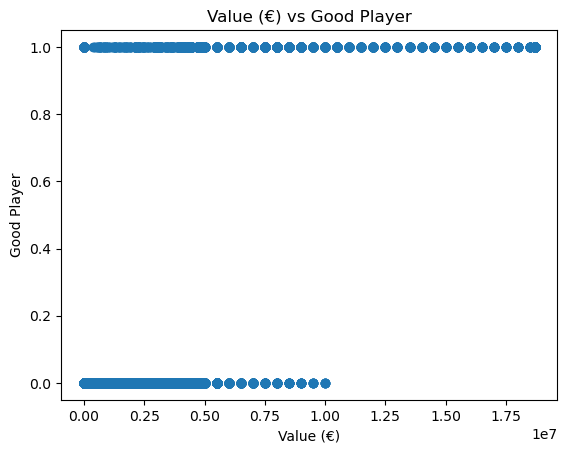

In [89]:
x = feature_selected_fifa_df['Value (€)'].values
y = feature_selected_fifa_df['Good Player'].values

plt.scatter(x, y)
plt.xlabel('Value (€)')
plt.ylabel('Good Player')
plt.title('Value (€) vs Good Player')
plt.show()

NOTE:
1. Get feature with correlation > 50%

In [90]:
high_medium_correlated_features = target_correlation[target_correlation > 0.5].index

### Feature Importance

In [91]:
# TODO: Use tree-based models (Random Forest, Gradient Boosting) to evaluate the importance of each feature

### Domain Knowledge

In [92]:
# TODO: Use understanding in the domain

### Selecting Feature

In [93]:
feature_selected_fifa_df = feature_selected_fifa_df[[*high_medium_correlated_features]]

feature_selected_fifa_df.head(2)

,Good Player,Value (€),Potential Value,Wage (€),Best Overall Rating,Release Clause (€),Reactions,International Reputation,Potential,Potential Normalized
0,1,1.869589e+07,1.811928e+07,73807.945008,87.000000,64599999,90.321591,2.514853,87.000000,0.969159
1,1,1.869589e+07,1.869589e+07,73807.945008,88.073376,161000000,90.321591,2.514853,89.768582,1.000000


## Exporting Feature Selected Dataset

In [94]:
feature_selected_fifa_df.to_csv('../../../datasets/preprocessed/ft_selected.csv', index=False)
feature_selected_fifa_df.to_csv('../../../datasets/processed/processed.csv', index=False)